<a href="https://colab.research.google.com/github/afifrizkyandika11551100310/SEQUENSIAL_PATTERN_MINING_BMKG/blob/main/Testing_Data_BMKG_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequensial Pattern Mining BMKG Dataset Jakarta**

Data yang digunakan adalah data laporan cuaca dari BMKG DKI Jakarta dengan rentang waktu seminggu selama 24 jam. Dataset ini menunjukkan kondisi langit Jakarta dengan menempatkan label sebagai sebuah indikasi yang menunjukkan langit Jakarta sedang dalam kondisi seperti apa. dari dataset berikut tugas penulis adalah menemukan sebuah sequensial yang dapat menemukan pola terhadap kondisi dari langit DKI Jakarta

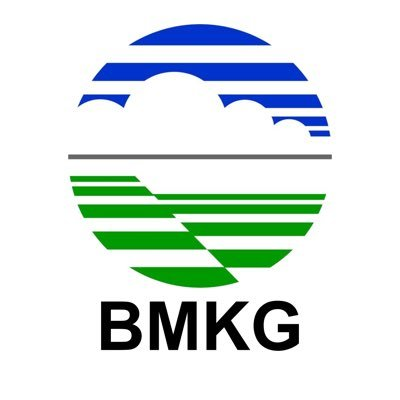

## **1.1 Library and Data Initiation**

In [ ]:
pip install prefixspan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11238 sha256=15728d442502c2d65e14729a9314eb341b4c242edb5c036320339744e2218134
  Stored in directory: /root/.cache/pip/wheels/99/6a/87/7170158a87b97a642d620ea1767f6519d2cf7db33cac1098ac
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28886 sha256=bdcae39c8cfe22316183b6a882dd5539efb58f1b8610efaca75d8fd352912100
  Stored in directory: /root/.cache/pip/wheels/78/c4/9d/581ca1511b5a7731bf2406c840dd445a6a8b8e494d29aa1c68
Successfully built prefixspan extratools


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prefixspan import PrefixSpan
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('data_cuaca_dki.csv')
df.head()

,id_station,name_station,data_timestamp,suhu udara,curah hujan,kelembapan udara,kecepatan angin,label
0,STA2172,AWS Maritim Tanjung Priok,2021-03-01 00:10:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
1,STA2172,AWS Maritim Tanjung Priok,2021-03-01 00:20:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
2,STA2172,AWS Maritim Tanjung Priok,2021-03-01 00:30:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
3,STA2172,AWS Maritim Tanjung Priok,2021-03-01 00:40:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
4,STA2172,AWS Maritim Tanjung Priok,2021-03-01 00:50:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal


## 1.2 **Data Composition**

Pada tahap berikut, akan dilakukan analisa meta data dari dataset yang digunakan untuk menentukan apa saja tahap preprocessing yang akan digunakan 

In [ ]:
# shape of dataset
df.shape

(4293, 8)

### **1.2.1 Check Null Values**

In [ ]:
df.isnull().sum()

id_station            0
name_station          0
data_timestamp        0
suhu udara           17
curah hujan          17
kelembapan udara     17
kecepatan angin     971
label                 0
dtype: int64

In [ ]:
null_data = df[df.isna().any(axis=1)]
null_data

,id_station,name_station,data_timestamp,suhu udara,curah hujan,kelembapan udara,kecepatan angin,label
83,STA2172,AWS Maritim Tanjung Priok,2021-03-01 17:20:00,NaN,NaN,NaN,NaN,Normal
183,STA2172,AWS Maritim Tanjung Priok,2021-03-02 14:20:00,NaN,NaN,NaN,NaN,Normal
214,STA2172,AWS Maritim Tanjung Priok,2021-03-02 20:30:00,NaN,NaN,NaN,NaN,Normal
291,STA2172,AWS Maritim Tanjung Priok,2021-03-03 13:20:00,NaN,NaN,NaN,NaN,Normal
331,STA2172,AWS Maritim Tanjung Priok,2021-03-04 03:10:00,NaN,NaN,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...
2148,STA2046,AWS PIK,2021-03-06 01:50:00,Suhu Normal,Berawan,Kelembapan Normal,NaN,Normal
2153,STA2046,AWS PIK,2021-03-06 02:40:00,Suhu Normal,Berawan,Kelembapan Normal,NaN,Normal
2203,STA2046,AWS PIK,2021-03-06 11:10:00,Suhu Normal,Hujan Ringan,Kelembapan Normal,NaN,Normal
2648,STA2181,AWS Stamet 745 Kemayoran,2021-03-03 07:00:00,NaN,NaN,NaN,NaN,Normal


dapat dilihat pada kolom **kecepatan angin** terdapat kekosongan data yang cukup signifikan sehingga terdapat kebutuhan preprocessing memenuhi kekosongan data tersebut nantinya. untuk mengetahui hal tersebut, akan ditanpilkan apa saja komposisi deskriptif value yang terdapat pada masing - masing kolom dari dataset yang digunakan 

### **1.2.2 Count Values**

pada tahap ini akan ditampilkan apa saja isi dari kolom - kolom strategis yang akan menjadi nilai input dari algoritma yang akan digunakan

In [ ]:
# columns nama stasiun
df['name_station'].value_counts()

AWS TMII                     983
AWS Matoa                    982
AWS Stamet 745 Kemayoran     895
AWS Maritim Tanjung Priok    727
AWS PIK                      706
Name: name_station, dtype: int64

In [ ]:
# columns suhu udara, ekstrem: < 15
df['suhu udara'].value_counts()

Suhu Normal        4273
Kurang dari 15C       3
Name: suhu udara, dtype: int64

In [ ]:
# columns curah hujan, ga ada yang ekstrem di sini
df['curah hujan'].value_counts()

Berawan         2101
Hujan Ringan    1991
Hujan Sedang     184
Name: curah hujan, dtype: int64

In [ ]:
# columns kelembapan udara, ekstrem: < 40% 
df['kelembapan udara'].value_counts()

Kelembapan Normal    4273
Kurang dari 40%         3
Name: kelembapan udara, dtype: int64

In [ ]:
# columns kecepatan angin; ekstrem: topan
df['kecepatan angin'].value_counts()

Tenang          1544
Topan            632
Sepoi Lemah      575
Teduh            525
Sepoi Lembut      46
Name: kecepatan angin, dtype: int64

In [ ]:
# columns label 
df['label'].value_counts()

Normal     3658
Ekstrem     635
Name: label, dtype: int64

## **1.3 Preprocessing**

In [ ]:
# fill null columns with 0
new_df.fillna(0,inplace=True)
new_df.head()

NameError: ignored

In [ ]:
sample = new_df.sample(frac=0.50).reset_index().drop(columns = 'index')
sample

,name_station,data_timestamp,suhu udara,curah hujan,kelembapan udara,kecepatan angin,label
0,AWS TMII,2021-03-02 06:30:00,Suhu Normal,Berawan,Kelembapan Normal,Topan,Ekstrem
1,AWS PIK,2021-03-03 02:30:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
2,AWS PIK,2021-03-05 19:50:00,Suhu Normal,Hujan Ringan,Kelembapan Normal,Tenang,Normal
3,AWS TMII,2021-03-07 22:00:00,Suhu Normal,Hujan Ringan,Kelembapan Normal,Topan,Ekstrem
4,AWS Matoa,2021-03-05 16:10:00,Suhu Normal,Hujan Sedang,Kelembapan Normal,0,Normal
...,...,...,...,...,...,...,...
2141,AWS TMII,2021-03-04 08:00:00,Suhu Normal,Berawan,Kelembapan Normal,Topan,Ekstrem
2142,AWS Matoa,2021-03-04 12:40:00,Suhu Normal,Hujan Ringan,Kelembapan Normal,0,Normal
2143,AWS PIK,2021-03-04 16:00:00,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
2144,AWS PIK,2021-03-05 19:30:00,Suhu Normal,Hujan Ringan,Kelembapan Normal,Tenang,Normal


In [ ]:
sample['data_timestamp'] = pd.to_datetime(sample['data_timestamp'])

In [ ]:
sample.dtypes

name_station                object
data_timestamp      datetime64[ns]
suhu udara                  object
curah hujan                 object
kelembapan udara            object
kecepatan angin             object
label                       object
dtype: object

In [ ]:
new_sample = sample.drop(columns = 'data_timestamp')
new_sample.head()

,name_station,suhu udara,curah hujan,kelembapan udara,kecepatan angin,label
0,AWS TMII,Suhu Normal,Berawan,Kelembapan Normal,Topan,Ekstrem
1,AWS PIK,Suhu Normal,Berawan,Kelembapan Normal,Tenang,Normal
2,AWS PIK,Suhu Normal,Hujan Ringan,Kelembapan Normal,Tenang,Normal
3,AWS TMII,Suhu Normal,Hujan Ringan,Kelembapan Normal,Topan,Ekstrem
4,AWS Matoa,Suhu Normal,Hujan Sedang,Kelembapan Normal,0,Normal


In [ ]:
# haah ?? kok tiba tiba bisa jalan ?? anjing la .. dari tadi bingung ngerun 10x tak jalan ntah dimana salah nya 
transactions = []
for i in range(0, len(new_sample)):
    transactions.append([str(new_sample.values[i,j]) for j in range(0, 6) if str(new_sample.values[i,j])!='0'])

In [ ]:
transactions[4]

['AWS Matoa', 'Suhu Normal', 'Hujan Sedang', 'Kelembapan Normal', 'Normal']

## **1.4 Previx Span Algorithm**

In [ ]:
sp = PrefixSpan(transactions)

In [ ]:
hasil = sp.frequent(7)
print('Rule yang dihasilkan =', len(hasil))

Rule yang dihasilkan = 527


In [ ]:
hasil

[(481, ['AWS TMII']),
 (481, ['AWS TMII', 'Suhu Normal']),
 (177, ['AWS TMII', 'Suhu Normal', 'Berawan']),
 (177, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Kelembapan Normal']),
 (153, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Kelembapan Normal', 'Topan']),
 (153,
  ['AWS TMII',
   'Suhu Normal',
   'Berawan',
   'Kelembapan Normal',
   'Topan',
   'Ekstrem']),
 (153, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Kelembapan Normal', 'Ekstrem']),
 (18,
  ['AWS TMII', 'Suhu Normal', 'Berawan', 'Kelembapan Normal', 'Sepoi Lemah']),
 (18,
  ['AWS TMII',
   'Suhu Normal',
   'Berawan',
   'Kelembapan Normal',
   'Sepoi Lemah',
   'Normal']),
 (24, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Kelembapan Normal', 'Normal']),
 (153, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Topan']),
 (153, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Topan', 'Ekstrem']),
 (153, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Ekstrem']),
 (18, ['AWS TMII', 'Suhu Normal', 'Berawan', 'Sepoi Lemah']),
 (18, ['AWS TMII', 'Suhu Normal', 'Berawa

In [ ]:
hasil_df = pd.DataFrame(hasil)
hasil_df.rename(columns={0: 'Sequence_Pattern', 1: 'Condition'}, inplace=True)

In [ ]:
hasil_df.sort_values(by=['Sequence_Pattern'], ascending=True).head(15)

,Sequence_Pattern,Condition
423,14,"[AWS Stamet 745 Kemayoran, Suhu Normal, Berawan, Kelembapan Normal, Sepoi Lembut, Normal]"
422,14,"[AWS Stamet 745 Kemayoran, Suhu Normal, Berawan, Kelembapan Normal, Sepoi Lembut]"
487,14,"[AWS Stamet 745 Kemayoran, Berawan, Sepoi Lembut, Normal]"
486,14,"[AWS Stamet 745 Kemayoran, Berawan, Sepoi Lembut]"
478,14,"[AWS Stamet 745 Kemayoran, Berawan, Kelembapan Normal, Sepoi Lembut, Normal]"
477,14,"[AWS Stamet 745 Kemayoran, Berawan, Kelembapan Normal, Sepoi Lembut]"
431,14,"[AWS Stamet 745 Kemayoran, Suhu Normal, Berawan, Sepoi Lembut]"
432,14,"[AWS Stamet 745 Kemayoran, Suhu Normal, Berawan, Sepoi Lembut, Normal]"
496,16,"[AWS Stamet 745 Kemayoran, Kelembapan Normal, Sepoi Lembut]"
521,16,"[AWS Stamet 745 Kemayoran, Sepoi Lembut]"
